<a href="https://colab.research.google.com/github/KeanDevDev/skill-25/blob/main/SKILL_EXPT_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Diabetes.csv')
print(df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

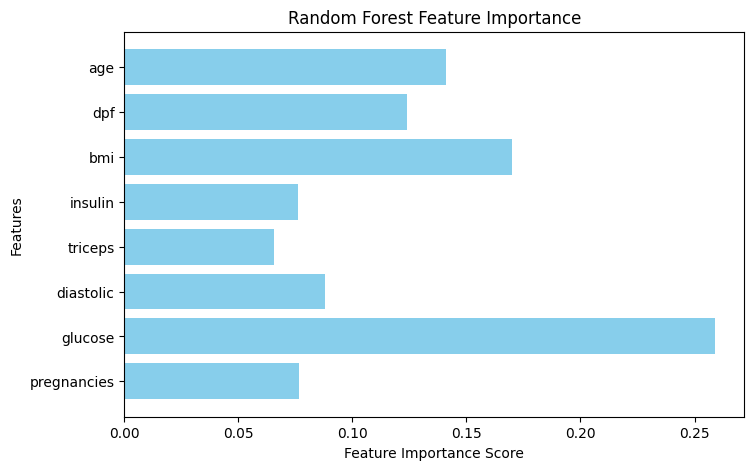

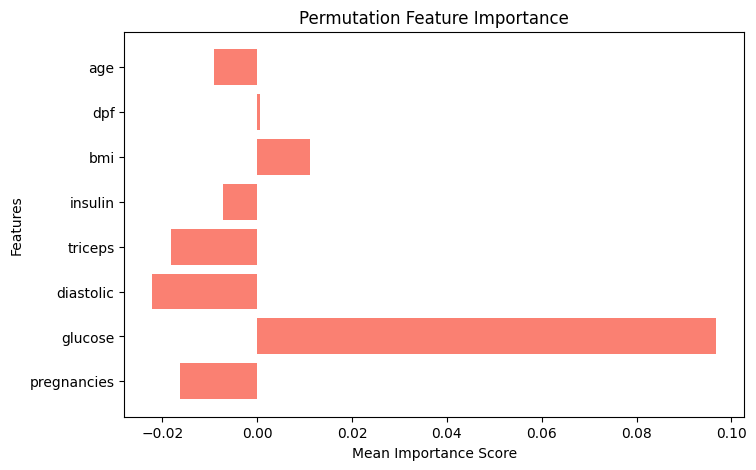

Random Forest Feature Importance:
pregnancies: 0.0766
glucose: 0.2589
diastolic: 0.0881
triceps: 0.0656
insulin: 0.0761
bmi: 0.1700
dpf: 0.1238
age: 0.1409

Permutation Feature Importance:
pregnancies: -0.0162
glucose: 0.0968
diastolic: -0.0221
triceps: -0.0182
insulin: -0.0071
bmi: 0.0110
dpf: 0.0006
age: -0.0091


In [6]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_importance = rf.feature_importances_


plt.figure(figsize=(8, 5))
plt.barh(X.columns, rf_importance, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)


plt.figure(figsize=(8, 5))
plt.barh(X.columns, perm_importance.importances_mean, color='salmon')
plt.xlabel('Mean Importance Score')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()


print("Random Forest Feature Importance:")
for feature, score in zip(X.columns, rf_importance):
    print(f"{feature}: {score:.4f}")

print("\nPermutation Feature Importance:")
for feature, score in zip(X.columns, perm_importance.importances_mean):
    print(f"{feature}: {score:.4f}")